# DMM Clustering Analysis
###  COVIRT19 microbial subgroup seqscreen analysis 
#### Date : 21 DEC 2020 
#### Maintained by :
    Jochum, Michael D. 
    Baylor College of Medicine 
    michael.jochum@bcm.edu

#### The purpose of this code is to:
- use dmm clustering unsupervised machinge learning to cluster samples based on the GO Term counts

load the libraries and set the environment

In [51]:
library(tidyverse)
library(phyloseq)
setwd('../')

load the preprocessing RData

In [40]:
load(file = "./images/0_preprocessing.RDA")

### Dirichlet multinomial mixture modeling

In [41]:
pseq <- term_pseq_no_neg
pseq  #[ 13534 taxa and 86 samples ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 13534 taxa and 86 samples ]
sample_data() Sample Data:       [ 86 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 13534 taxa by 3 taxonomic ranks ]

In order to run the dmm clustering analysis we need to transform the counts by sqrt which decreases the disparity in counts while maintining the resolution

In [42]:
#Lets try sqrt root
dat <-(sqrt(abundances(pseq)))
count <- as.matrix(t(dat))

Run the model

In [43]:
tic("dmm_modeling")
    print("dmm modeling starting")
    fit <- lapply(1:8, dmn, count = count, verbose=TRUE)
    print("dmm modeling finished")
    print(fit)
toc()

[1] "dmm modeling starting"


dmn, k=1



  Soft kmeans
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=2



  Soft kmeans
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=3



  Soft kmeans
    iteration 10 change 0.000022
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=4



  Soft kmeans
    iteration 10 change 0.000002
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=5



  Soft kmeans
    iteration 10 change 0.000016
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=6



  Soft kmeans
    iteration 10 change 0.000027
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=7



  Soft kmeans
    iteration 10 change 0.000044
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=8



  Soft kmeans
    iteration 10 change 0.000037
  Expectation Maximization setup
  Expectation Maximization
  Hessian
[1] "dmm modeling finished"
[[1]]
class: DMN 
k: 1 
samples x taxa: 86 x 13534 
Laplace: 1357724 BIC: 1384701 AIC: 1368092 

[[2]]
class: DMN 
k: 2 
samples x taxa: 86 x 13534 
Laplace: 1310725 BIC: 1378274 AIC: 1345056 

[[3]]
class: DMN 
k: 3 
samples x taxa: 86 x 13534 
Laplace: 1292084 BIC: 1391186 AIC: 1341358 

[[4]]
class: DMN 
k: 4 
samples x taxa: 86 x 13534 
Laplace: 1299803 BIC: 1435896 AIC: 1369458 

[[5]]
class: DMN 
k: 5 
samples x taxa: 86 x 13534 
Laplace: Inf BIC: 1496174 AIC: 1413126 

[[6]]
class: DMN 
k: 6 
samples x taxa: 86 x 13534 
Laplace: Inf BIC: 1575826 AIC: 1476169 

[[7]]
class: DMN 
k: 7 
samples x taxa: 86 x 13534 
Laplace: 1388216 BIC: 1606348 AIC: 1490080 

[[8]]
class: DMN 
k: 8 
samples x taxa: 86 x 13534 
Laplace: Inf BIC: 1699237 AIC: 1566360 

dmm_modeling: 13938.791 sec elapsed


look at the results of the fit

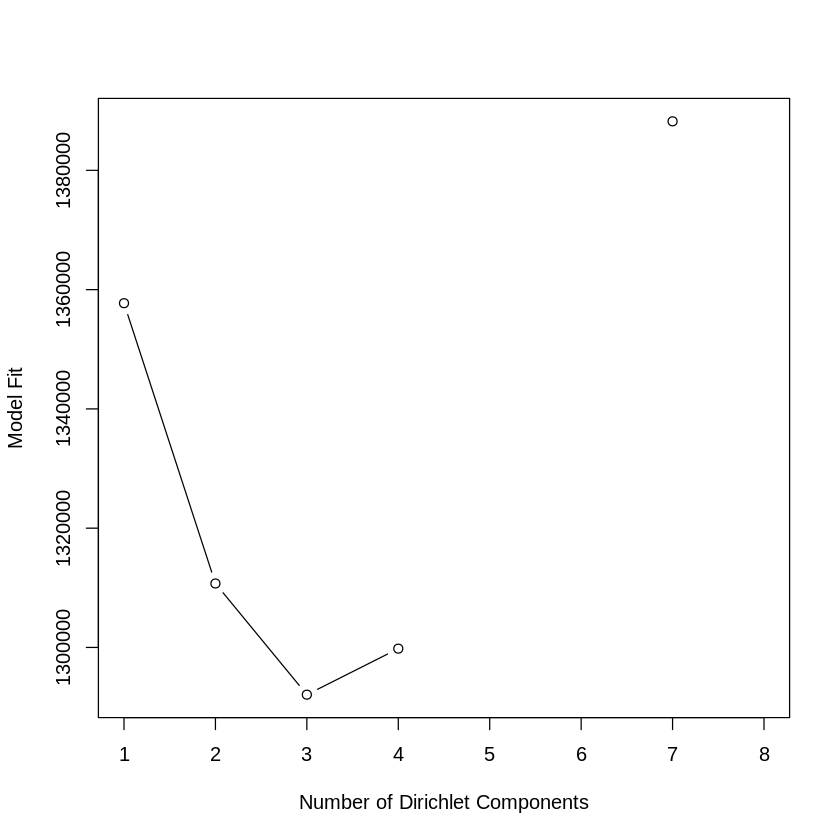

In [44]:
set.seed(seed = 3.14159265358979) #cool number
lplc <- sapply(fit, laplace) # AIC / BIC / Laplace
aic  <- sapply(fit, AIC) # AIC / BIC / Laplace
bic  <- sapply(fit, BIC) # AIC / BIC / Laplace
plot(lplc, type="b", xlab="Number of Dirichlet Components", ylab="Model Fit")

looks like there are 3 distinct clusters

In [45]:
best <- fit[[which.min(lplc)]]
best

class: DMN 
k: 3 
samples x taxa: 86 x 13534 
Laplace: 1292084 BIC: 1391186 AIC: 1341358 

print out the theta values

In [46]:
mixturewt(best)

pi,theta
<dbl>,<dbl>
0.4534884,9385.946
0.3953488,4783.906
0.1511628,31684.925


save the datasheet that show which GO terms contributed to each dmm group

In [47]:
write.table(fitted(best),"./results/GO_TERMS_DMM_contributions.tsv", sep="\t")

save a datasheet that identifies which sample belongs to which dmm group

In [48]:
ass <- apply(mixture(best), 1, which.max)
write.table(ass,"./results/GO_TERMS_DMM_groups.tsv",sep="")

In [49]:
#add the dmm group to the metadata
sample_data(term_pseq_no_neg_gonames)$dmn<-ass

In [50]:
save.image(file = "./images/1_dmm.RDA")